In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

In [5]:
from sklearn.metrics import r2_score

In [6]:
df=pd.read_csv("Fish.csv")

In [7]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
df.shape

(159, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [11]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [12]:
df_num=df.select_dtypes(["float64"])

In [13]:
df_num.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


0.5829159978264967


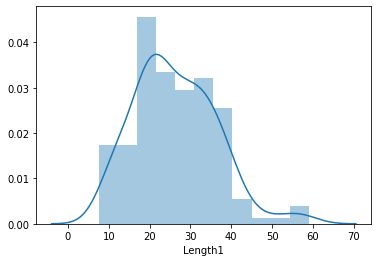

0.534756603258803


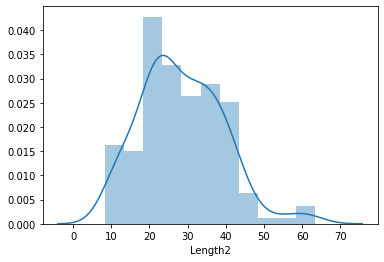

0.38783734376005685


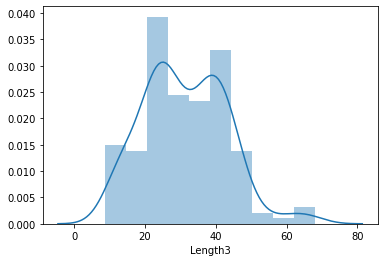

0.3934294586710571


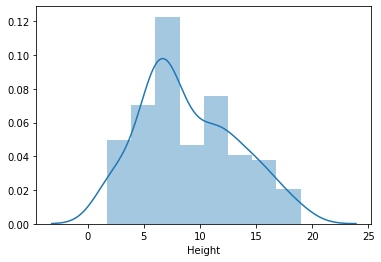

0.004925214786310108


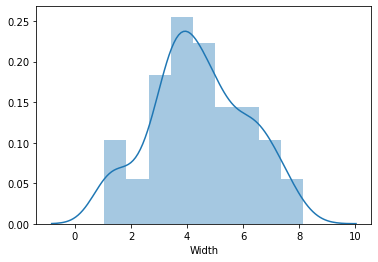

In [14]:
for col in df_num:
    if col!="Weight":
        plt.figure()
        sns.distplot(df_num[col])
        print(skew(df_num[col]))
        plt.show()

In [15]:
for col in df_num:
    if col!="Weight":
        print(col,':',skew(df_num[col]))

Length1 : 0.5829159978264967
Length2 : 0.534756603258803
Length3 : 0.38783734376005685
Height : 0.3934294586710571
Width : 0.004925214786310108


In [16]:
for col in df_num:
    if skew(df_num[col]) >= 0.1 or skew(df_num[col]) <= -0.1 :
        if col!="Weight":
            print(col,':',skew(df_num[col]))

Length1 : 0.5829159978264967
Length2 : 0.534756603258803
Length3 : 0.38783734376005685
Height : 0.3934294586710571


In [17]:
for col in df_num:
    if skew(df_num[col]) >= 0.1 or skew(df_num[col]) <= -0.1 :
        if col!="Weight":
            df_num[col]=np.sqrt(df_num[col])
            print(col,':',skew(df_num[col]))

Length1 : 0.06627677080109667
Length2 : 0.011661098509793365
Length3 : -0.08980155772275802
Height : -0.13273476019637634


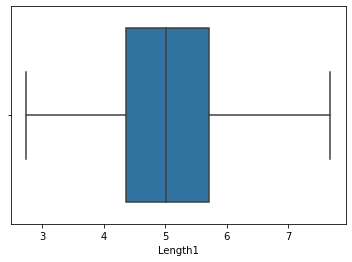

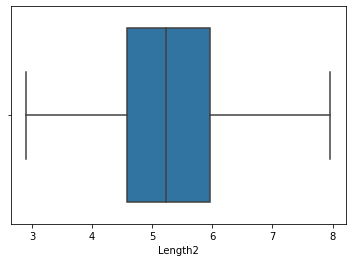

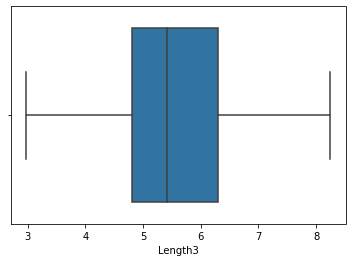

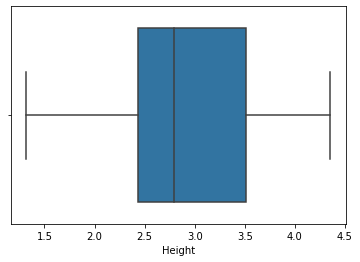

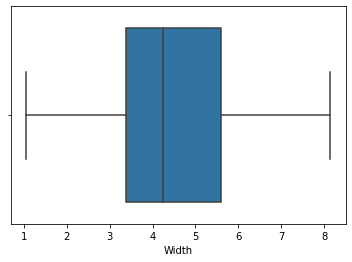

In [18]:
for col in df_num:
     if col!="Weight":
        plt.figure()
        sns.boxplot(df_num[col])
        plt.show()

In [19]:
df_cat=df.select_dtypes(object)

In [20]:
df_cat.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [21]:
le=LabelEncoder()

In [22]:
df_cat['Species']=le.fit_transform(df["Species"])

In [23]:
df_cat.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [24]:
df_new=pd.concat([df_cat,df_num],axis=1)

In [25]:
df_new.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,4.816638,5.039841,5.477226,3.394113,4.0200
1,0,290.0,4.898979,5.128353,5.585696,3.532704,4.3056
2,0,340.0,4.888763,5.147815,5.576737,3.518210,4.6961
3,0,363.0,5.128353,5.385165,5.787918,3.567913,4.4555
4,0,430.0,5.147815,5.385165,5.830952,3.527605,5.1340


In [26]:
X=df_new.drop("Weight",axis=1)
Y=df_new["Weight"]

In [27]:
X.head()

,Species,Length1,Length2,Length3,Height,Width
0,0,4.816638,5.039841,5.477226,3.394113,4.0200
1,0,4.898979,5.128353,5.585696,3.532704,4.3056
2,0,4.888763,5.147815,5.576737,3.518210,4.6961
3,0,5.128353,5.385165,5.787918,3.567913,4.4555
4,0,5.147815,5.385165,5.830952,3.527605,5.1340


In [28]:
Y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [30]:
ss=StandardScaler()

In [31]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [32]:
def create_model(model):
    model.fit(X_train_ss,Y_train)
    Y_pred=model.predict(X_test_ss)
    print(r2_score(Y_test,Y_pred))

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
create_model(lr)

0.7925698778183397


In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dt=DecisionTreeRegressor()
create_model(dt)

0.9666782405142708


In [38]:
from sklearn.svm import LinearSVR

In [39]:
svr1=LinearSVR()
create_model(svr1)

-0.4451060790232113


In [40]:
from sklearn.svm import SVR

In [41]:
svr2=SVR(kernel='poly')
svr3=SVR(kernel='rbf')

In [42]:
create_model(svr2)

0.23247603374271486


In [43]:
create_model(svr3)

0.032009599075485284


In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor 

In [45]:
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xg=XGBRegressor()

In [46]:
create_model(ada)

0.9532101507224922


In [47]:
create_model(gb)

0.9782584028668407


In [48]:
create_model(xg)

0.9742603533892624


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [50]:
bc1=BaggingRegressor(XGBRegressor(),random_state=1)
bc2=BaggingRegressor(XGBRegressor(),random_state=1,bootstrap=False)

In [51]:
create_model(bc1)

0.9746455304351924


In [52]:
create_model(bc2)

0.9742603603556182


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr=RandomForestRegressor()

In [55]:
create_model(rfr)

0.9647281313674051
